In [1]:
import pandas as pd
import numpy as np

In [51]:
X=pd.read_csv('bankniftyoneminutefinal.csv')

In [52]:
X=X.set_index(pd.to_datetime(X['date']), drop=False)

In [53]:
X.head()

,date,time,open,high,low,close,Unnamed: 6
date,,,,,,,
2015-01-09,1/9/2015,9:15:00,18845.9,18845.90,18801.70,18801.70,NaN
2015-01-09,1/9/2015,9:16:00,18801.7,18806.05,18790.20,18794.65,NaN
2015-01-09,1/9/2015,9:17:00,18796.0,18829.00,18794.65,18827.30,NaN
2015-01-09,1/9/2015,9:18:00,18827.3,18864.00,18827.30,18862.10,NaN
2015-01-09,1/9/2015,9:19:00,18862.1,18862.10,18843.55,18849.25,NaN


In [55]:
#X['date'].iloc[-1]

'11/27/2020'

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543751 entries, 2015-01-09 to 2020-11-27
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        543750 non-null  object 
 1   time        543750 non-null  object 
 2   open        543750 non-null  float64
 3   high        543750 non-null  float64
 4   low         543750 non-null  float64
 5   close       543750 non-null  float64
 6   Unnamed: 6  0 non-null       float64
dtypes: float64(5), object(2)
memory usage: 33.2+ MB


In [54]:
X['date_time']=pd.to_datetime(X['date'] + ' ' + X['time'])

In [55]:
X.head(10)

,date,time,open,high,low,close,Unnamed: 6,date_time
date,,,,,,,,
2015-01-09,1/9/2015,9:15:00,18845.90,18845.90,18801.70,18801.70,NaN,2015-01-09 09:15:00
2015-01-09,1/9/2015,9:16:00,18801.70,18806.05,18790.20,18794.65,NaN,2015-01-09 09:16:00
2015-01-09,1/9/2015,9:17:00,18796.00,18829.00,18794.65,18827.30,NaN,2015-01-09 09:17:00
2015-01-09,1/9/2015,9:18:00,18827.30,18864.00,18827.30,18862.10,NaN,2015-01-09 09:18:00
2015-01-09,1/9/2015,9:19:00,18862.10,18862.10,18843.55,18849.25,NaN,2015-01-09 09:19:00
2015-01-09,1/9/2015,9:20:00,18849.25,18853.30,18841.40,18850.70,NaN,2015-01-09 09:20:00
2015-01-09,1/9/2015,9:21:00,18846.60,18859.65,18846.60,18859.65,NaN,2015-01-09 09:21:00
2015-01-09,1/9/2015,9:22:00,18859.65,18859.65,18840.80,18840.80,NaN,2015-01-09 09:22:00
2015-01-09,1/9/2015,9:23:00,18840.80,18840.80,18829.80,18831.95,NaN,2015-01-09 09:23:00


In [14]:
rets=X['close'].pct_change()

In [15]:
rets

date
2015-01-09         NaN
2015-01-09   -0.000375
2015-01-09    0.001737
2015-01-09    0.001848
2015-01-09   -0.000681
                ...   
2020-11-27   -0.000437
2020-11-27   -0.000999
2020-11-27   -0.000647
2020-11-27    0.000935
2020-11-27   -0.000429
Name: close, Length: 543751, dtype: float64

In [56]:
X['hour']=X['date_time'].dt.hour

In [57]:
X['min']=X['date_time'].dt.minute

In [195]:
X.shape

(543751, 11)

In [304]:
X.head()

,date,time,open,high,low,close,Unnamed: 6,date_time,hour,min,position
date,,,,,,,,,,,
2015-01-09,1/9/2015,9:15:00,18845.9,18845.90,18801.70,18801.70,NaN,2015-01-09 09:15:00,9.0,15.0,9.0
2015-01-09,1/9/2015,9:16:00,18801.7,18806.05,18790.20,18794.65,NaN,2015-01-09 09:16:00,9.0,16.0,9.0
2015-01-09,1/9/2015,9:17:00,18796.0,18829.00,18794.65,18827.30,NaN,2015-01-09 09:17:00,9.0,17.0,9.0
2015-01-09,1/9/2015,9:18:00,18827.3,18864.00,18827.30,18862.10,NaN,2015-01-09 09:18:00,9.0,18.0,9.0
2015-01-09,1/9/2015,9:19:00,18862.1,18862.10,18843.55,18849.25,NaN,2015-01-09 09:19:00,9.0,19.0,9.0


In [305]:
y=X.set_index('date_time')

In [308]:
def resample_stock_data(df, timedelta):
    # make a copy
    df = df.copy()

    # convert index to datetime
    df.index = pd.to_datetime(df.index)

    # sort the index (evidently required by resample())
    df = df.sort_index()

    aggregation_dict = {
         'open': 'mean', 
         'high': 'max',
         'low': 'min',
         'close': 'mean',
         
    }

    rename_dict = {
        'open': 'open',
        'high': 'high',
        'low': 'low',
        'close': 'close',
        
    }


    return (df
      .resample(timedelta)
      .agg(aggregation_dict)
      .rename(columns=rename_dict)
    )

In [343]:
X_15=resample_stock_data(y,'15min')

In [344]:
X_15.head()

,open,high,low,close
date_time,,,,
2015-01-09 09:15:00,18831.340000,18864.0,18790.20,18829.473333
2015-01-09 09:30:00,18795.460000,18821.4,18758.50,18792.466667
2015-01-09 09:45:00,18780.100000,18808.3,18761.10,18781.236667
2015-01-09 10:00:00,18791.433333,18813.6,18758.50,18790.326667
2015-01-09 10:15:00,18792.143333,18807.1,18769.45,18793.803333


In [345]:
X_15.shape

(206329, 4)

In [335]:
X_15['open']=x3['open']

In [ ]:
m=list(x3['close'])

In [336]:
X_15['close']=x4['close']

In [337]:
X_15.head()

,open,high,low,close
date_time,,,,
2015-01-09 09:15:00,18845.90,18864.0,18790.20,NaN
2015-01-09 09:30:00,18815.15,18821.4,18758.50,NaN
2015-01-09 09:45:00,18774.15,18808.3,18761.10,NaN
2015-01-09 10:00:00,18802.90,18813.6,18758.50,NaN
2015-01-09 10:15:00,18781.15,18807.1,18769.45,NaN


In [196]:
x2=X[X['min']==15]

In [207]:
x2.shape

(10150, 11)

In [313]:
x2.head(50)

,date,time,open,high,low,close,Unnamed: 6,date_time,hour,min,position
date,,,,,,,,,,,
2015-01-09,1/9/2015,9:15:00,18845.90,18845.90,18801.70,18801.70,NaN,2015-01-09 09:15:00,9.0,15.0,9.0
2015-01-09,1/9/2015,10:15:00,18781.15,18792.20,18781.15,18786.70,NaN,2015-01-09 10:15:00,10.0,15.0,10.0
2015-01-09,1/9/2015,11:15:00,18779.35,18783.70,18776.65,18777.75,NaN,2015-01-09 11:15:00,11.0,15.0,11.0
2015-01-09,1/9/2015,12:15:00,18616.35,18621.65,18613.20,18618.30,NaN,2015-01-09 12:15:00,12.0,15.0,12.0
2015-01-09,1/9/2015,13:15:00,18569.40,18588.10,18565.95,18576.65,NaN,2015-01-09 13:15:00,13.0,15.0,13.0
2015-01-09,1/9/2015,14:15:00,18514.15,18514.15,18490.60,18508.70,NaN,2015-01-09 14:15:00,14.0,15.0,14.0
2015-01-09,1/9/2015,15:15:00,18663.05,18663.05,18655.20,18657.60,NaN,2015-01-09 15:15:00,15.0,15.0,0.0
2015-01-12,1/12/2015,9:15:00,18632.00,18632.00,18557.20,18557.20,NaN,2015-01-12 09:15:00,9.0,15.0,9.0
2015-01-12,1/12/2015,10:15:00,18748.15,18752.65,18742.80,18752.65,NaN,2015-01-12 10:15:00,10.0,15.0,10.0


In [346]:
x3=X[X['min']%15==0]

In [348]:
x3.shape

(36250, 11)

In [318]:
x3=x3.set_index('date_time')

In [324]:
x3.head(50)

,date,time,open,high,low,close,Unnamed: 6,hour,min,position
date_time,,,,,,,,,,
2015-01-09 09:15:00,1/9/2015,9:15:00,18845.90,18845.90,18801.70,18801.70,NaN,9.0,15.0,9.0
2015-01-09 09:30:00,1/9/2015,9:30:00,18815.15,18821.40,18796.65,18796.65,NaN,9.0,30.0,9.0
2015-01-09 09:45:00,1/9/2015,9:45:00,18774.15,18780.80,18761.50,18768.90,NaN,9.0,45.0,9.0
2015-01-09 10:00:00,1/9/2015,10:00:00,18802.90,18807.85,18802.90,18807.30,NaN,10.0,0.0,10.0
2015-01-09 10:15:00,1/9/2015,10:15:00,18781.15,18792.20,18781.15,18786.70,NaN,10.0,15.0,10.0
2015-01-09 10:30:00,1/9/2015,10:30:00,18803.00,18806.90,18801.70,18803.10,NaN,10.0,30.0,10.0
2015-01-09 10:45:00,1/9/2015,10:45:00,18764.00,18768.00,18763.10,18764.50,NaN,10.0,45.0,10.0
2015-01-09 11:00:00,1/9/2015,11:00:00,18778.30,18790.00,18778.30,18787.65,NaN,11.0,0.0,11.0
2015-01-09 11:15:00,1/9/2015,11:15:00,18779.35,18783.70,18776.65,18777.75,NaN,11.0,15.0,11.0


In [325]:
x4=X[X['min']%15==14]

In [330]:
x4=x4.set_index('date_time')

In [326]:
x4.head()

,date,time,open,high,low,close,Unnamed: 6,date_time,hour,min,position
date,,,,,,,,,,,
2015-01-09,1/9/2015,9:29:00,18817.60,18817.80,18811.95,18815.15,NaN,2015-01-09 09:29:00,9.0,29.0,9.0
2015-01-09,1/9/2015,9:44:00,18763.05,18772.70,18758.50,18771.60,NaN,2015-01-09 09:44:00,9.0,44.0,9.0
2015-01-09,1/9/2015,9:59:00,18797.65,18808.30,18797.65,18802.90,NaN,2015-01-09 09:59:00,9.0,59.0,9.0
2015-01-09,1/9/2015,10:14:00,18769.55,18781.15,18769.55,18781.15,NaN,2015-01-09 10:14:00,10.0,14.0,10.0
2015-01-09,1/9/2015,10:29:00,18807.10,18807.10,18802.25,18803.00,NaN,2015-01-09 10:29:00,10.0,29.0,10.0


In [342]:
len(X_15)

206329

In [118]:
'''index = X.index
condition = X["position"] == 0
apples_indices = index[condition]
'''

In [119]:
apples_indices #not

DatetimeIndex(['2015-01-09', '2015-01-09', '2015-01-09', '2015-01-09',
               '2015-01-09', '2015-01-09', '2015-01-09', '2015-01-09',
               '2015-01-09', '2015-01-09',
               ...
               '2020-11-27', '2020-11-27', '2020-11-27', '2020-11-27',
               '2020-11-27', '2020-11-27', '2020-11-27', '2020-11-27',
               '2020-11-27', '2020-11-27'],
              dtype='datetime64[ns]', name='date', length=21750, freq=None)

In [59]:
y=X

In [60]:
y['position']=y['hour']

In [25]:
y['position']=np.zeros(len(y))

In [61]:
y.head()

,date,time,open,high,low,close,Unnamed: 6,date_time,hour,min,position
date,,,,,,,,,,,
2015-01-09,1/9/2015,9:15:00,18845.9,18845.90,18801.70,18801.70,NaN,2015-01-09 09:15:00,9.0,15.0,9.0
2015-01-09,1/9/2015,9:16:00,18801.7,18806.05,18790.20,18794.65,NaN,2015-01-09 09:16:00,9.0,16.0,9.0
2015-01-09,1/9/2015,9:17:00,18796.0,18829.00,18794.65,18827.30,NaN,2015-01-09 09:17:00,9.0,17.0,9.0
2015-01-09,1/9/2015,9:18:00,18827.3,18864.00,18827.30,18862.10,NaN,2015-01-09 09:18:00,9.0,18.0,9.0
2015-01-09,1/9/2015,9:19:00,18862.1,18862.10,18843.55,18849.25,NaN,2015-01-09 09:19:00,9.0,19.0,9.0


In [28]:
y['position']=np.where((y['hour'] >= 15) & (y['min'] >= 15),0,1)

In [70]:
for i in range(len(y)):
    if((y['hour'][i] >= 15) and (y['min'][i] >= 15)):
        y['position'][i]=0

<ipython-input-70-08ab5568f593>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['position'][i]=0


In [65]:
y[(y['hour']>=15) & (y['min']>=15)]['position']=0

<ipython-input-65-91810691d81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[(y['hour']>=15) & (y['min']>=15)]['position']=0


In [71]:
len(y[y['position']==0])

21750

In [117]:
X.head()

,time,open,high,low,close,Unnamed: 6,hour,min,position
date,,,,,,,,,
2015-01-09,9:15:00,18845.9,18845.90,18801.70,18801.70,NaN,9.0,15.0,9.0
2015-01-09,9:16:00,18801.7,18806.05,18790.20,18794.65,NaN,9.0,16.0,9.0
2015-01-09,9:17:00,18796.0,18829.00,18794.65,18827.30,NaN,9.0,17.0,9.0
2015-01-09,9:18:00,18827.3,18864.00,18827.30,18862.10,NaN,9.0,18.0,9.0
2015-01-09,9:19:00,18862.1,18862.10,18843.55,18849.25,NaN,9.0,19.0,9.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543751 entries, 2015-01-09 to 2020-11-27
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        543750 non-null  object 
 1   open        543750 non-null  float64
 2   high        543750 non-null  float64
 3   low         543750 non-null  float64
 4   close       543750 non-null  float64
 5   Unnamed: 6  0 non-null       float64
dtypes: float64(5), object(1)
memory usage: 27.0+ MB


In [11]:
X.describe()

,open,high,low,close,Unnamed: 6,hour,min
count,543750.000000,543750.000000,543750.000000,543750.000000,0.0,543749.000000,543749.000000
mean,23023.955159,23031.477792,23016.380972,23023.899420,NaN,11.879996,29.200002
std,4758.339303,4759.105536,4757.565424,4758.323675,NaN,1.840001,17.053672
min,13441.550000,13471.450000,13411.600000,13442.800000,NaN,9.000000,0.000000
25%,18723.462500,18730.162500,18716.500000,18723.475000,NaN,10.000000,15.000000
50%,23267.450000,23274.600000,23260.000000,23267.550000,NaN,12.000000,28.000000
75%,26828.537500,26835.850000,26821.750000,26828.600000,NaN,13.000000,44.000000
max,32607.500000,32611.200000,32598.350000,32608.250000,NaN,15.000000,59.000000


<AxesSubplot:xlabel='date'>

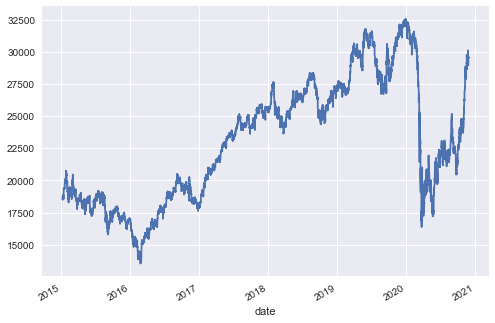

In [199]:
x2['close'].plot()

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")


class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SMA parameters
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SMA parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, SMA_S, SMA_L, start, end):
        
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester( SMA_S = {}, SMA_L = {}, start = {}, end = {})".format( self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = x2
        raw = x2.loc[:,["close",'hour','min']]
        #raw=X.loc[:,'close']
        raw = raw.loc[self.start:self.end]
        
        raw.rename(columns={"close": "price"}, inplace=True)
        raw['returns']=raw['price'].pct_change()
        #raw["returns"] = np.log(raw['price'] / raw['price'].shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        
        if SMA_S is not None:
            
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
#         for i in range(len(data)):
#             if((data['hour'][i] >= 15) and (data['min'][i] >= 15)):
#                 data['position'][i]=0
        #data[(data['hour']>=15) & (data['min']>=15)]['position']=0
        
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = (1+data["returns"]).cumprod()-1
        data["cstrategy"] = (1+data["strategy"]).cumprod()-1
        self.results = data
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = " SMA_S = {} | SMA_L = {}".format( self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative absolute performance (for minimazation algorithm).
        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.
        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

In [231]:
tester = SMABacktester( 13, 15, "2015-01-09", "2019-05-09")

In [232]:
tester

SMABacktester( SMA_S = 13, SMA_L = 15, start = 2015-01-09, end = 2019-05-09)

In [233]:
tester.test_strategy()

(1.028046, 0.498302)

In [234]:
tester.results

,price,hour,min,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
date,,,,,,,,,,
2015-01-13,18884.85,10.0,15.0,-0.000257,18695.388462,18706.966667,-1,0.000257,-0.000257,0.000257
2015-01-13,18862.80,11.0,15.0,-0.001168,18714.196154,18712.040000,1,0.001168,-0.001424,0.001425
2015-01-13,18840.80,12.0,15.0,-0.001166,18734.515385,18716.243333,1,-0.001166,-0.002589,0.000257
2015-01-13,18881.35,13.0,15.0,0.002152,18763.180769,18733.780000,1,0.002152,-0.000442,0.002409
2015-01-13,18843.25,14.0,15.0,-0.002018,18777.461538,18751.553333,1,-0.002018,-0.002459,0.000387
...,...,...,...,...,...,...,...,...,...,...
2019-05-09,29017.40,11.0,15.0,0.003297,29163.292308,29232.263333,-1,-0.003297,0.536149,1.019627
2019-05-09,28930.50,12.0,15.0,-0.002995,29105.065385,29183.926667,-1,0.002995,0.531549,1.025675
2019-05-09,28890.55,13.0,15.0,-0.001381,29050.776923,29129.590000,-1,0.001381,0.529434,1.028473


In [34]:
%matplotlib inline

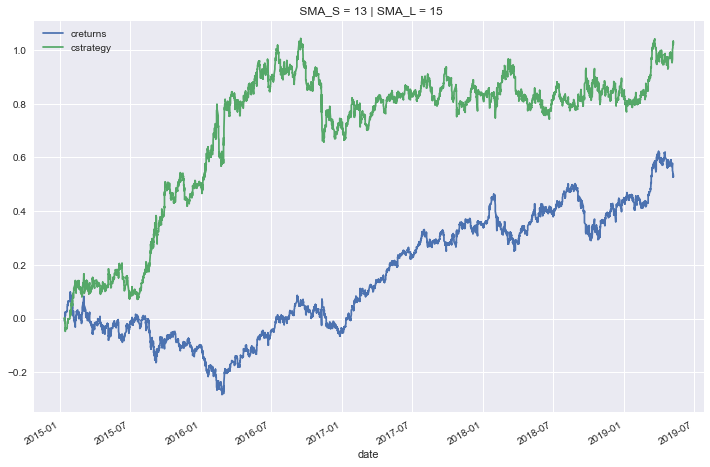

In [235]:
tester.plot_results()

In [230]:
tester.optimize_parameters((5, 30, 1), (10, 50, 1))

(array([13., 15.]), 1.028046)

In [239]:
df=tester.results

In [240]:
df.head()

,price,hour,min,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
date,,,,,,,,,,
2015-01-13,18884.85,10.0,15.0,-0.000257,18695.388462,18706.966667,-1,0.000257,-0.000257,0.000257
2015-01-13,18862.80,11.0,15.0,-0.001168,18714.196154,18712.040000,1,0.001168,-0.001424,0.001425
2015-01-13,18840.80,12.0,15.0,-0.001166,18734.515385,18716.243333,1,-0.001166,-0.002589,0.000257
2015-01-13,18881.35,13.0,15.0,0.002152,18763.180769,18733.780000,1,0.002152,-0.000442,0.002409
2015-01-13,18843.25,14.0,15.0,-0.002018,18777.461538,18751.553333,1,-0.002018,-0.002459,0.000387


In [241]:
len(df[df['position']==0])

0

In [24]:
# assign buy and sell call
df['call']=df['position']

In [263]:
lits=[]
bp=[]
sp=[]
for i in range(len(df)-1):
    if((df['position'][i]==-1) and (df['position'][i+1]==1)):
        lits.append('buy')
        bp.append(df['price'][i])
    elif((df['position'][i]==1) and (df['position'][i+1]==-1)):
        lits.append('sell')
        sp.append(df['price'][i])
    elif(df['position'][i]==0):
        lits.append('exit')
    else:
        lits.append('hold')
        
lits.append('over')

In [264]:
len(bp)

378

In [265]:
len(sp)

378

In [268]:
prof=0
for i in range(len(bp)):
    if(bp[i]>sp[i]):
        prof=prof+1
los=len(bp)-prof

In [269]:
los

197

In [270]:

for i in range(len(bp)-1):
    if(bp[i+1]>sp[i]):
        los=los+1


In [272]:
756-395

361

In [250]:
lits.append('over')

In [253]:
df['call']=lits

In [254]:
df.head()

,price,hour,min,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,call
date,,,,,,,,,,,
2015-01-13,18884.85,10.0,15.0,-0.000257,18695.388462,18706.966667,-1,0.000257,-0.000257,0.000257,buy
2015-01-13,18862.80,11.0,15.0,-0.001168,18714.196154,18712.040000,1,0.001168,-0.001424,0.001425,hold
2015-01-13,18840.80,12.0,15.0,-0.001166,18734.515385,18716.243333,1,-0.001166,-0.002589,0.000257,hold
2015-01-13,18881.35,13.0,15.0,0.002152,18763.180769,18733.780000,1,0.002152,-0.000442,0.002409,hold
2015-01-13,18843.25,14.0,15.0,-0.002018,18777.461538,18751.553333,1,-0.002018,-0.002459,0.000387,hold


In [255]:
tot_trades=len(df[df['call']=='buy'])+len(df[df['call']=='sell'])

In [256]:
tot_trades

756

In [257]:
pro=0
los=0
bu=0
se=0
for i in range(len(df)):
    if(df['call'][i]=='buy'):
        bu=bu+df['strategy'][i]
        if(se>0):
            pro=pro+1
            se=0
        elif(se<0):
            se=0
            los=los+1
    elif(df['call'][i]=='sell'):
        se=se+df['strategy'][i]
        if(bu>0):
            pro=pro+1
            bu=0
        elif(bu<0):
            bu=0
            los=los+1
#     elif(df['call'][i]=='exit'):
#         if(bu>0):
#             pro=pro+1
#             bu=0
#         elif(bu<0):
#             bu=0
#             los=los+1
#         if(se>0):
#             pro=pro+1
#             se=0
#         elif(se<0):
#             se=0
#             los=los+1
        


In [258]:
pro=0
los=0
bu=100
se=100

lis_pro=[]
lis_loss=[]
for i in range(len(df)):
    if(df['call'][i]=='buy'):
        bu=bu*(1+df['strategy'][i])
        if(se>100):
            lis_pro.append(se)
            pro=pro+1
            se=100
        elif(se<100):
            lis_loss.append(se)
            se=100
            los=los+1
    elif(df['call'][i]=='sell'):
        se=se*(1+df['strategy'][i])
        if(bu>100):
            lis_pro.append(bu)
            pro=pro+1
            bu=100
        elif(bu<100):
            lis_loss.append(bu)
            bu=100
            los=los+1
#     elif(df['call'][i]=='exit'):
#         if(bu>100):
#             lis_pro.append(bu)
#             pro=pro+1
#             bu=100
#         elif(bu<100):
#             lis_loss.append(bu)
#             bu=100
#             los=los+1
#         if(se>100):
#             lis_pro.append(bu)
#             pro=pro+1
#             se=100
#         elif(se<100):
#             lis_loss.append(bu)
#             se=100
#             los=los+1

In [261]:
np.std(lis_pro)

0.2979051590365096

In [262]:
np.std(lis_loss)

0.45163446294164117

In [259]:
pro

352

In [260]:
los

403

In [273]:
win_ratio=pro/tot_trades

In [274]:
los_ratio=los/tot_trades

In [275]:
win_ratio

0.4656084656084656

In [276]:
los_ratio

0.5224867724867724

In [277]:
cagr=df['cstrategy'].iloc[-1]

In [278]:
cagr

1.0280459508080382

In [140]:
ord_profit=(df['creturns'].iloc[-1])*100

In [141]:
ord_profit

56.1014709339475

In [284]:
wealth_index=1000*(1+df['strategy']).cumprod()
previous_peak=wealth_index.cummax()
drawdown=(wealth_index-previous_peak)/previous_peak

In [285]:
min(drawdown)

-0.18830904040599006

In [286]:
df["drawdown"]=drawdown

In [287]:
df.head(50)

,price,hour,min,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,call,drawdown
date,,,,,,,,,,,,
2015-01-13,18884.85,10.0,15.0,-0.000257,18695.388462,18706.966667,-1,0.000257,-0.000257,0.000257,buy,0.000000
2015-01-13,18862.80,11.0,15.0,-0.001168,18714.196154,18712.040000,1,0.001168,-0.001424,0.001425,hold,0.000000
2015-01-13,18840.80,12.0,15.0,-0.001166,18734.515385,18716.243333,1,-0.001166,-0.002589,0.000257,hold,-0.001166
2015-01-13,18881.35,13.0,15.0,0.002152,18763.180769,18733.780000,1,0.002152,-0.000442,0.002409,hold,0.000000
2015-01-13,18843.25,14.0,15.0,-0.002018,18777.461538,18751.553333,1,-0.002018,-0.002459,0.000387,hold,-0.002018
2015-01-13,18715.90,15.0,15.0,-0.006758,18789.669231,18765.366667,1,-0.006758,-0.009201,-0.006374,hold,-0.008763
2015-01-14,18657.00,9.0,15.0,-0.003147,18782.311538,18765.326667,1,-0.003147,-0.012319,-0.009501,hold,-0.011882
2015-01-14,18681.00,10.0,15.0,0.001286,18779.684615,18773.580000,1,0.001286,-0.011048,-0.008227,hold,-0.010611
2015-01-14,18656.90,11.0,15.0,-0.001290,18777.692308,18767.196667,1,-0.001290,-0.012324,-0.009507,hold,-0.011887


In [147]:
x1=df.groupby('date')['1+s'].cumprod().reset_index()

In [148]:
x1.head()

,date,1+s
0,2015-01-09,1.000541
1,2015-01-09,1.001085
2,2015-01-09,1.001436
3,2015-01-09,1.003017
4,2015-01-09,1.002462


In [152]:
x1['prev_peak']=x1.groupby('date')['1+s'].cummax().reset_index()['1+s']

In [155]:
x1.head()

,date,1+s,prev_peak,drawdown
0,2015-01-09,1.000541,1.000541,0.000000
1,2015-01-09,1.001085,1.001085,0.000000
2,2015-01-09,1.001436,1.001436,0.000000
3,2015-01-09,1.003017,1.003017,0.000000
4,2015-01-09,1.002462,1.003017,-0.000555


In [154]:
x1['drawdown']=x1['1+s']-x1['prev_peak']

In [156]:
min(x1['drawdown'])

-0.073379345235567

In [288]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
   
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [289]:
ann=annualize_rets(df['strategy'],252*6)

In [290]:
ann

0.15468866460624486

In [291]:
std=df['strategy'].std()*((252*6)**0.5)

In [292]:
std

0.16719027760637128

In [293]:
sharpe_ratio=(ann-0.03)/std

In [294]:
sharpe_ratio

0.7457889680631359

In [295]:
mar=cagr/-min(x1['drawdown'])

In [296]:
mar

14.010018044011435

In [299]:
df.head(50)

,price,hour,min,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,call,drawdown
date,,,,,,,,,,,,
2015-01-13,18884.85,10.0,15.0,-0.000257,18695.388462,18706.966667,-1,0.000257,-0.000257,0.000257,buy,0.000000
2015-01-13,18862.80,11.0,15.0,-0.001168,18714.196154,18712.040000,1,0.001168,-0.001424,0.001425,hold,0.000000
2015-01-13,18840.80,12.0,15.0,-0.001166,18734.515385,18716.243333,1,-0.001166,-0.002589,0.000257,hold,-0.001166
2015-01-13,18881.35,13.0,15.0,0.002152,18763.180769,18733.780000,1,0.002152,-0.000442,0.002409,hold,0.000000
2015-01-13,18843.25,14.0,15.0,-0.002018,18777.461538,18751.553333,1,-0.002018,-0.002459,0.000387,hold,-0.002018
2015-01-13,18715.90,15.0,15.0,-0.006758,18789.669231,18765.366667,1,-0.006758,-0.009201,-0.006374,hold,-0.008763
2015-01-14,18657.00,9.0,15.0,-0.003147,18782.311538,18765.326667,1,-0.003147,-0.012319,-0.009501,hold,-0.011882
2015-01-14,18681.00,10.0,15.0,0.001286,18779.684615,18773.580000,1,0.001286,-0.011048,-0.008227,hold,-0.010611
2015-01-14,18656.90,11.0,15.0,-0.001290,18777.692308,18767.196667,1,-0.001290,-0.012324,-0.009507,hold,-0.011887


In [300]:
df.to_csv('backtest.csv')

In [101]:
df.groupby('call').sum()

,price,hour,min,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
call,,,,,,,,,,
buy,2.604532e+07,14214.0,35040.0,0.113904,2.600282e+07,2.600364e+07,-1191,-0.071562,1401.935933,1558.194230
exit,3.473459e+08,239160.0,350761.0,-0.011728,3.473665e+08,3.473699e+08,0,0.083543,18696.275828,20804.771934
no trade,8.287382e+09,4468237.0,11218270.0,0.542485,8.287104e+09,8.286336e+09,14168,0.625293,446076.732464,496178.532542
over,2.887130e+04,15.0,29.0,-0.000094,2.891936e+04,2.890214e+04,0,0.000000,1.561015,1.642000
sell,2.590948e+07,14143.0,35110.0,-0.133360,2.595444e+07,2.595356e+07,1184,-0.100199,1394.609996,1548.777082


In [67]:
lis=[]
m=0
for i in range(len(df)):
    if(df['strategy'][i]>0):
        m=m+1
        lis.append(m)
    else:
        m=0
        lis.append(m)


In [68]:
df['winning_streak']=lis


In [64]:
max(lis)

15

In [69]:
df.head()

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,winning_streak
date,,,,,,,,,
2015-01-09,18750.70,-0.000240,18775.748333,18788.373643,-1,0.000240,0.999760,1.000240,1
2015-01-09,18741.40,-0.000496,18774.701667,18787.960853,-1,0.000496,0.999264,1.000736,2
2015-01-09,18741.00,-0.000021,18773.466667,18787.291860,-1,0.000021,0.999243,1.000758,3
2015-01-09,18743.05,0.000109,18771.880000,18786.368992,-1,-0.000109,0.999352,1.000648,0
2015-01-09,18742.85,-0.000011,18770.633333,18785.544186,-1,0.000011,0.999342,1.000659,1


In [103]:
wealth_index

date
2015-01-09    1000.541058
2015-01-09    1001.085397
2015-01-09    1001.436061
2015-01-09    1003.018830
2015-01-09    1002.463971
                 ...     
2019-05-09    1710.995046
2019-05-09    1710.995046
2019-05-09    1710.995046
2019-05-09    1710.995046
2019-05-09    1710.995046
Name: strategy, Length: 398600, dtype: float64

In [104]:
df['drawdown']=drawdown*100

In [105]:
min(drawdown)

-0.11767016438881397

In [81]:
df.tail(50)

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,winning_streak,drawdown
date,,,,,,,,,,
2020-01-09,32117.55,0.000044,32094.076667,32092.770930,1,0.000044,1.712461,3.840028,3,-13.640369
2020-01-09,32107.25,-0.000321,32094.646667,32093.304651,1,-0.000321,1.711912,3.838797,0,-13.668064
2020-01-09,32093.80,-0.000419,32095.091667,32093.686047,1,-0.000419,1.711195,3.837189,0,-13.704229
2020-01-09,32096.35,0.000079,32095.415000,32094.013566,1,0.000079,1.711331,3.837494,1,-13.697373
2020-01-09,32058.20,-0.001189,32094.686667,32094.004264,1,-0.001189,1.709297,3.832932,0,-13.799953
2020-01-09,32066.75,0.000267,32094.773333,32094.034884,1,0.000267,1.709752,3.833955,1,-13.776963
2020-01-09,32087.05,0.000633,32095.390000,32094.163178,1,0.000633,1.710835,3.836382,2,-13.722379
2020-01-09,32072.85,-0.000443,32095.050000,32094.223643,1,-0.000443,1.710078,3.834684,0,-13.760561
2020-01-09,32071.50,-0.000042,32094.775000,32094.186047,1,-0.000042,1.710006,3.834523,0,-13.764191


In [297]:
win_ratio=tot_prof_trades/len(df)

NameError: name 'tot_prof_trades' is not defined

In [73]:
np.exp(df['returns'][0]+df['returns'][1])

0.9992642040607405